date,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.40,12.69,12.88,13.28,13.73,14.18
Canada,NaN,0.0,0.00,0.01,0.02,0.03,0.03,0.03,0.05,0.07,...,48.10,49.25,50.14,50.89,51.77,52.39,53.05,53.95,54.99,55.71
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.18,39.68,39.95,40.11,40.29,40.64,41.29,41.87,42.40,42.61
Russia,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.04,...,10.20,10.30,10.50,10.53,10.70,10.81,11.07,11.12,11.19,11.29
United Kingdom,0.13,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,...,55.01,55.33,55.63,55.82,55.99,56.27,56.61,56.99,57.29,57.56


country,Australia,Canada,Germany,Russia,United Kingdom
date,,,,,
2020-01-23,0.000000,NaN,NaN,NaN,NaN
2020-01-25,0.000016,NaN,NaN,NaN,NaN
2020-01-26,0.000016,0.000003,NaN,NaN,NaN
2020-01-27,0.000019,0.000003,NaN,NaN,NaN
2020-01-28,0.000019,0.000005,0.000005,NaN,NaN
...,...,...,...,...,...
2021-05-25,0.116788,3.642529,4.374704,3.397954,6.612093
2021-05-26,0.116854,3.648718,4.380047,3.403604,6.616504
2021-05-27,0.116897,3.661252,4.388347,3.409708,6.621495


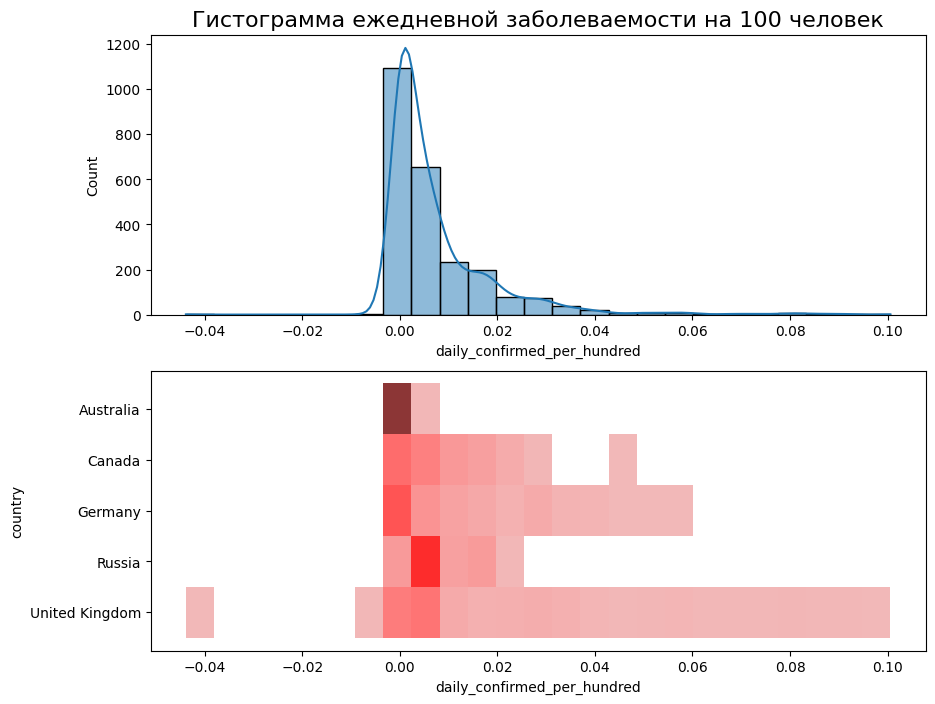

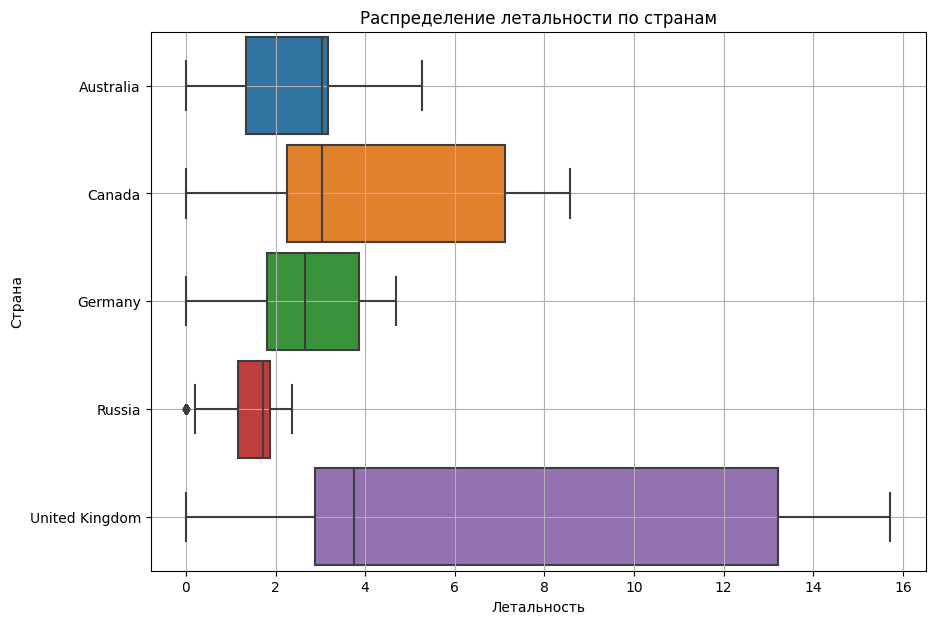

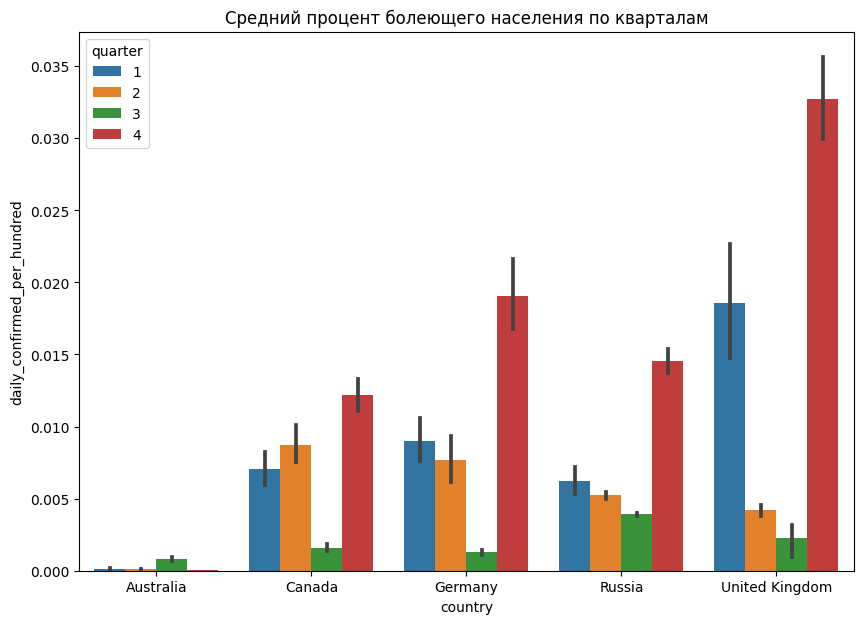

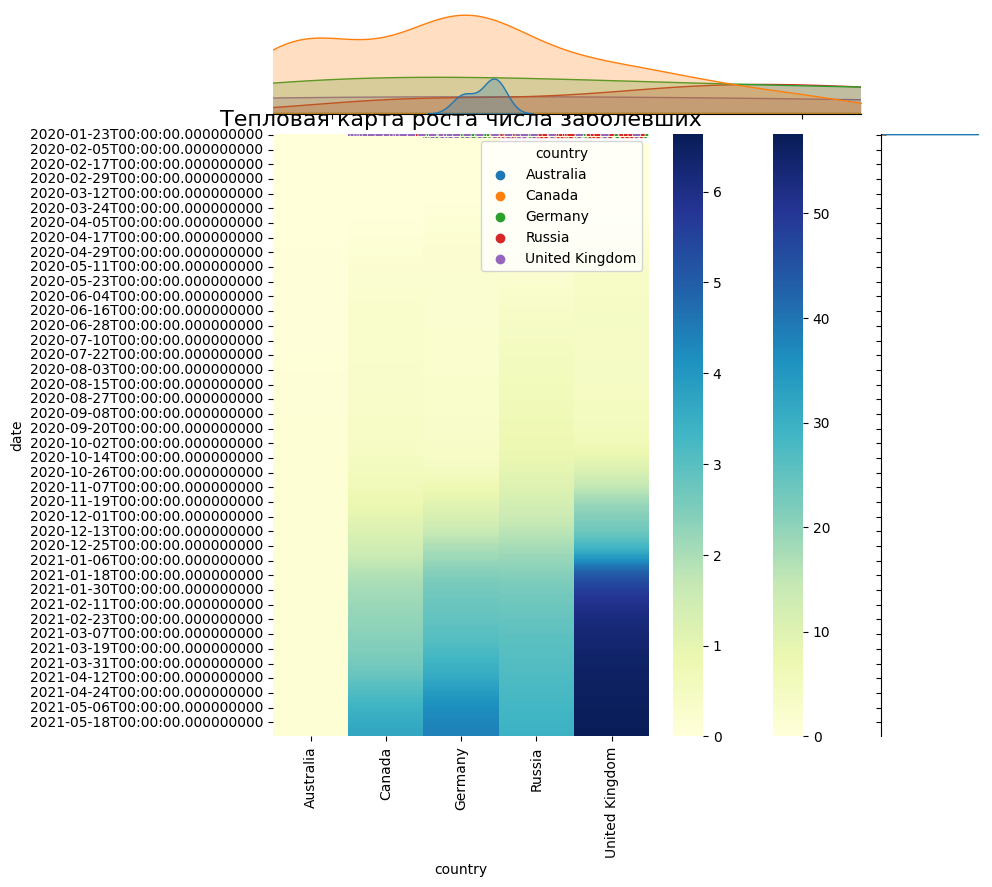

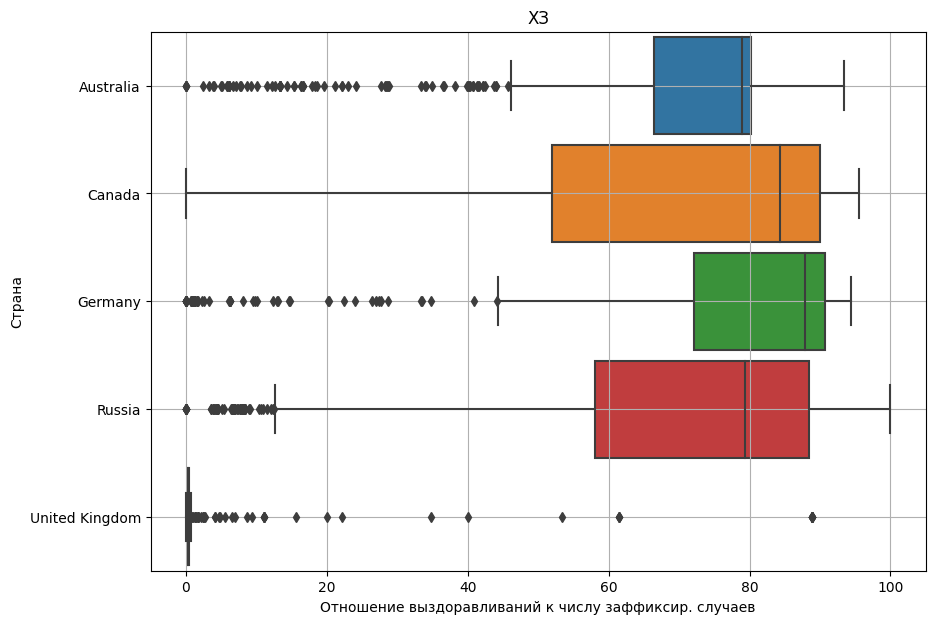

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
covid_df=pd.read_csv('data/covid_df.csv', sep=',')
covid_df['death_rate']=covid_df['deaths']/covid_df['confirmed']*100
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df.to_csv('data/covid_df.csv', index=False)

countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
); 
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
); 



# Создадим коробчатую диаграмму

fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

# Создадим столчаттую диаграмму
fig = plt.figure(figsize=(10, 7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter',
)
barplot.set_title('Средний процент болеющего населения по кварталам');

# Самый любимый дата-саентистами график, в котором совмещены диграмма-рассеяния и гистограмма
jointplot = sns.jointplot(
    data=croped_covid_df, 
    x='people_fully_vaccinated_per_hundred', 
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim = (0, 40),
    ylim = (0, 0.1),
    height=8,
)

# погнали за тепловой картой
# предварительно создадим новую таблицу по столбцам отложим признак даты, а по строкам — страны. 
# В ячейках таблицы будет находиться процент вакцинированных (первым компонентом) людей в стране на определённую дату. 
# Чтобы даты отображались на тепловой карте верно, их необходимо привести к типу string.
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

# для тепловой карты 
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16); 

# Задание 4.
croped_covid_df['confirmed_per_hundred']=croped_covid_df['confirmed'] / croped_covid_df['population']*100
croped_covid_df['date']=pd.to_datetime(croped_covid_df['date'])
pivot=croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='country',
    index='date'
)
display(pivot)
heatmap=sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта роста числа заболевших', fontsize=16); 

# Задание 5.
croped_covid_df['recover_rate']=croped_covid_df['recovered'] / croped_covid_df['confirmed']*100
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='recover_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('ХЗ');
boxplot.set_xlabel('Отношение выздоравливаний к числу заффиксир. случаев');
boxplot.set_ylabel('Страна');
boxplot.grid()
covid_df['recover_rate']=croped_covid_df['recover_rate']
covid_df.to_csv('data/covid_df.csv', index=False)